In [ ]:
%load_ext autoreload
%autoreload 2

import sys; sys.path.append('../lib/*/*'); sys.path.append('..')
from lib.Portfolio import Portfolio
from lib.RoboTrader import RoboTrader
from lib.trades.ShortSell import ShortSell
from lib.trades.ShortBuy import ShortBuy
from lib.Tuner import Tuner
import lib.Broker as Broker
import matplotlib.pyplot as plt
import lib.Globals as gb
import lib.Toolbox as tb
import datetime
import itertools
import copy
import yfinance as yf
import ray
import lib.TimeKeeper as tk
import pandas as pd
from lib.Strategy import SelectionStrategy, StockStrategy
from lib.strategies.selection_strategy.AccelerationSelection import AccelerationSelection
from lib.strategies.selection_strategy.SimpleSelection import SimpleSelection
from lib.strategies.stock_strategy.SmartSeeking import SmartSeeking
from lib.strategies.stock_strategy.BollingerSeeking import BollingerSeeking
from lib.Config import Config


In [ ]:
tb.update_tracked_archives()
archive_data = tb.get_archive('cvna')

# When is the Great Work Complete?
The Great Work will be complete when we have a machine that meets the following criteria:
1. It is able to scale it's earning income based on the amount of money that we have *without* adding more risk to our procedure
2. It is able to generate income from any stock, through a tuning method that is either extremely easy or fully automated, and it is able to generate that income in a method criteria 1.
3. It is able to predict changes in the market such that we don't have *any single* day where we lose a large amount of money, ever, period.

Once those criteria are met I think we can declare the great work complete.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
OUR START 2024-01-08 00:00:00-05:00
{60: 1, 45: 1, 30: 1, 15: 1, 5: 1} Sum is: 5 Thus We Buy


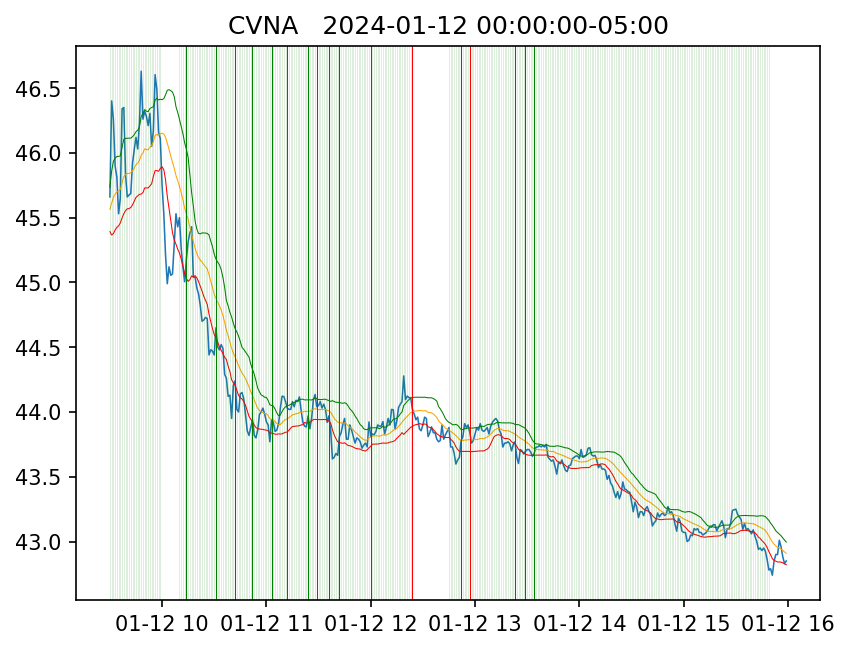

	CVNA PROFIT IS:	64.5 	HIGHEST HOLDING IS: 64.5
Our profit: 64.50000000000244 	Total Cash is: 5561
PROFIT: 64.5 DAILY: 64.5 BEST_DAY: 64.5 WORST_DAY: 64.5
DAILY GRIND: 64.50000000000244 0


In [7]:
%load_ext autoreload
%autoreload 2

from lib.Tuner import Tuner
from lib.strategies.selection_strategy.SimpleSelection import SimpleSelection
from lib.strategies.stock_strategy.HighFrequencySeeking import HighFrequencySeeking
from lib.Config import Config
import lib.Globals as gb
import lib.Toolbox as tb

with open('logs/test_logs.txt', 'w') as f:
    f.write('')

symbol = 'CVNA'
#tb.update_archive('CVNA')

t = Tuner()
archive = tb.get_archive(symbol)
days = tb.get_unique_dates(archive)
s = days[-1:]
res = t.single_symbol_trade_simulation(symbol, 
                   SimpleSelection,
                   BollingerSeeking,
                   #[6:7]
                   Config('base'), s, True, False, archive, tune=False)
print('DAILY GRIND:',res['profit']/len(s), res['pmin'])

In [ ]:
%load_ext autoreload
%autoreload 2

from lib.Tuner import Tuner
from lib.strategies.selection_strategy.SimpleSelection import SimpleSelection
from lib.strategies.stock_strategy.BollingerSeeking import BollingerSeeking
from lib.strategies.stock_strategy.SteadySeeking import SteadySeeking
from lib.strategies.stock_strategy.TrendSeeking import TrendSeeking
from lib.strategies.stock_strategy.AverageSeeking import AverageSeeking
from lib.strategies.stock_strategy.HighFrequencySeeking import HighFrequencySeeking
from lib.strategies.stock_strategy.DayTrendSeeking import DayTrendSeeking
from lib.Config import Config
import lib.Globals as gb
import lib.Toolbox as tb

#symbols = ['CVNA','MARA','AMZN','AMD','NIO','LCID','PLTR','AFRM']
symbols = ['CVNA']
#tb.update_archive('CVNA')

t = Tuner()
days = tb.get_unique_dates(archive)
s = days[-50:]
res = t.trade_simulation(symbols, 
                   SimpleSelection,
                   DayTrendSeeking,
                   #[6:7]
                   Config('base'), s, True, False, True, tune=False)
print('DAILY GRIND:',res['profit']/len(s), res['pmin'])

MARA PROFIT IS:	123.04 	HIGHEST HOLDING IS: 123.04
Our profit: 123.03999999999809 	Total Cash is: 104502
PROFIT: 1437.78 DAILY: 49.58 BEST_DAY: 2095.13 WORST_DAY: -2661.01

PROFIT: -1066.1 DAILY: -106.61 BEST_DAY: 2627.65 WORST_DAY: -2712.55
DAILY GRIND: -106.6100000000223 -4251.569240420069

In [ ]:
obv = tb.get_obv(tb.get_data('CVNA','1d','10d'))
obv.plot.line()
obv_ind = obv.diff()
days = []
add_it = False
for index in obv_ind.index:
    if add_it: days.append(index); add_it = False
    if obv_ind.loc[index] > 0: add_it = True
days

In [ ]:
%load_ext autoreload
%autoreload 2

from lib.Tuner import Tuner
from lib.strategies.selection_strategy.SimpleSelection import SimpleSelection
from lib.strategies.stock_strategy.BollingerSeeking import BollingerSeeking
from lib.Config import Config
import lib.Globals as gb
import lib.Toolbox as tb

symbol = 'CVNA'
#tb.update_archive('CVNA')

t = Tuner()
archive = tb.get_archive(symbol)
s=days
res = t.single_symbol_trade_simulation(symbol,
                   SimpleSelection,
                   BollingerSeeking,
                   #[6:7]
                   Config(symbol.lower()), s, True, False, archive, tune=False)
print('DAILY GRIND:',res['profit']/len(s), res['pmin'])

In [ ]:
prof = res['series']
totals = {}
for day in prof.index:
    name = day.day_name()
    if not name in totals: totals[name] = []
    totals[name].append(prof.loc[day].profit)
for key in totals:
    print(key)
    mini_total = 0
    for profit in totals[key]:
        print('\t',profit)
        mini_total+=profit
    print('\tThis days full profit is',mini_total)

In [ ]:
t = Tuner()
archive = tb.get_archive(symbol)
days = tb.get_unique_dates(archive)
s = days[-1:]
res = t.single_symbol_trade_simulation(symbol, 
                   SimpleSelection,
                   BollingerSeeking,
                   #[6:7]
                   Config('base'), s, False, True, archive, tune=False)
print('DAILY GRIND:',res['profit']/len(s), res['pmin'])

In [ ]:
t = Tuner()
tb.update_archive('CVNA')
archive = tb.get_archive(symbol)
days = tb.get_unique_dates(archive)
s = days[-10:]
res = t.single_symbol_trade_simulation(symbol, 
                   SimpleSelection,
                   BollingerSeeking,
                   #[6:7]
                   Config('base'), s, True, True, archive, tune=False)
print('DAILY GRIND:',res['profit']/len(s), res['pmin'])

In [ ]:
'''
337 no tuning, bol_dev 1, order dev 12
657 no tuning, bol_dev 1, order dev 6

327 with tuning
-2227

282 with tuning, trying with 2 not as an option
-2221.307778321606
'''

In [ ]:
mo_data = tb.get_data('CVNA','1d','3mo')
data = tb.get_archive('CVNA')[mo_data.index[0]: mo_data.index[-1]]

In [ ]:
rsi = tb.get_rsi(mo_data, period=10, column='close')
correspondances = []
for index in rsi.index:
    trend = tb.get_trend(tk.get_workday(data, index).open)
    #print('trend of',index,'is',trend)
    correspondances.append({'date':index, 'rsi':rsi.loc[index], 'trend':tb.get_trend(tk.get_workday(data, index).open)})

In [ ]:
df = pd.DataFrame(correspondances)
low_count, low_total = 0, 0
high_count, high_total = 0, 0
for index in df.index[1:]:
    #print(df.date.loc[index],round(df.rsi.loc[index]),df.trend.loc[index] > 0)
    if df.rsi.loc[index-1] < 20:
        low_total += 1
        if df.trend.loc[index] < 0: low_count += 1
    if df.rsi.loc[index-1] > 70:
        high_total += 1
        if df.trend.loc[index] > 0: high_count += 1

print(low_count/low_total, low_total)
print(high_count/high_total, high_total)

In [ ]:
t = Tuner()
symbol = 'CVNA'
conf = Config('base.json')
archive = tb.get_archive(symbol)

# res = t.trade_simulation(symbol, SimpleSelection, SteadySeeking, conf, [tk.to_time(12,21)], True, False, archive)
res = t.single_symbol_trade_simulation(symbol, SimpleSelection, SteadySeeking, conf, tb.get_unique_dates(archive)[75:], True, False, archive)

In [ ]:
full_res = {}
for symbol in tb.get_symbols('tracked_tickers.txt'):
    #if symbol == 'CVNA': continue
    t = Tuner()
    conf = Config('base.json')
    archive = tb.get_archive(symbol)
    results = t.tuning([['BOL_DEV', [1,1.25,1.5]], ['STEADY_OFFSET', [.5,1,1.5]]], symbol,
             SimpleSelection, SteadySeeking, conf, tb.get_unique_dates(archive)[3:])
    full_res[symbol] = results

In [ ]:
for symbol in full_res:
    df = full_res[symbol]
    prof_id = df.profit.idxmax()
    print(symbol, df.profit.loc[prof_id], df.config.loc[prof_id].STEADY_OFFSET, df.config.loc[prof_id].BOL_DEV)

In [ ]:
symbol = 'CVNA'

t = Tuner()
archive = tb.get_archive(symbol)
date = tk.to_time(10,3)
t.single_symbol_trade_simulation(symbol, 
                   SimpleSelection,
                   SteadySeeking,
                   Config('base'), [date], True, False, archive, tune=False)

In [ ]:
	CVNA PROFIT IS:	729.3799999999981
Our profit: 729.3799999999981
PROFIT: 1492.0899999999913 DAILY: 124.34083333333261

{'config': <lib.Config.Config at 0x7f9f5f67dcc0>,
 'pmax': 599.9677340702015,
 'pmin': -2198.470698242983,
 'profit': 1492.0899999999913}

In [ ]:
ms = r[['profit','pmin']].idxmax()
l = r.loc[ms.profit]
print(l.config.BOL_DEV, l.config.MINUTE_WAIT, l.config.BOL_HOP, l.pmax, l.pmin, l.profit)
l = r.loc[ms.pmin]
print(l.config.BOL_DEV, l.config.MINUTE_WAIT, l.config.BOL_HOP, l.pmax, l.pmin, l.profit)
#for index in r.index:
#    l = r.loc[index]
#    print(l.config.BOL_DEV, l.config.MINUTE_WAIT, l.config.BOL_HOP, l.pmax, l.pmin, l.profit)

In [ ]:
# Single Testing SmartSeeking

t = RoboTrader(None, 'training', config=Config('base'), submitted_symbols=['CVNA'])
t.port.cash = 100000
t.port.stocks.clear()
#res = t.simulate_trading(CombinedSelection, MACDSeeking, tk.to_time(8,21), cashout=True)
# res = t.simulate_trading(CombinedSelection, RSISeeking, tk.to_time(8,21), cashout=True)
res = t.simulate_trading(SimpleSelection,
                        #  TrendSeeking,
                         #BollingerSeeking,
                         HighFrequencySeeking,
                         tk.to_time(10,16),
                         cashout=True,
                         show_trades=True,
                         use_archive=tb.get_archive('CVNA'),
                         tune=False)

In [ ]:
# Week Testing

total_budget = 100000
#ray.shutdown()
#ray.init()
d = Diviner()#MACDSelection
# d.run_archive_stock_experiment(CombinedSelection, CombinedSeeking, True, False, cashout=False, show_trades=False, day_offset=3)
d.run_stock_experiment(SimpleSelection, HighFrequencySeeking, Config('base'), True, False,
                       cashout=True, show_trades=False, use_archive_data=True, day_offset=15, total_days = 15)

# Large Scale Data Variable Testing

In [ ]:
# Package the Packaged Data (yes really)

d = Diviner()
pairs = d.multiconfig_trial_smart()

d = Diviner()
full_tab = []
atts_of_interest = ['BOL_DEV', 'STD_SELL_THRESHOLD', 'TREND_SMOOTHING', 'WALKAWAY_PROFIT', 'ORDER_DIVIDER']#, 'WAIT_PERIOD']
# atts_of_interest =  ['ORDER_DIVIDER','MACD_SHORT', 'MACD_LONG']
for config in pairs:
    row = {}
    tab = d.package_se_results(pairs[config])['CVNA']
    for att in atts_of_interest:
        row[att] = getattr(config, att)
    row['total'] = round(tab.total_profit.sum(),2)
    row['highest_profit'] = round(tab.total_profit.max(),2)
    row['lowest_loss'] = round(tab.total_profit.min(),2)
    row['daily_earning'] = round(tab.total_profit.sum()/len(tab),2)
    full_tab.append(row)
full_tab = pd.DataFrame(full_tab)

In [ ]:
full_tab#.to_excel('output.xlsx')

In [ ]:
# Archive Testing SmartSeeking

import ray
ray.shutdown()

total_budget = 100000
#ray.shutdown()
#ray.init()
with open('./portfolio/test_logs.txt', 'w') as f: f.write('')
with open('./portfolio/training.json', 'w') as f: f.write('{"cash": '+str(total_budget)+'}')
d = Diviner()#MACDSelection
#d.run_archive_stock_experiment(CombinedSelection, CombinedSeeking, True, False, cashout=False, show_trades=False, day_offset=3)
#d.run_stock_experiment(CombinedSelection, CombinedSeeking, True, False, cashout=False, show_trades=True)
#SmartSeeking
exp = d.run_stock_experiment(SimpleSelection, SmartSeeking, Config('base.json'), True, False, cashout=False, show_trades=True, use_archive_data=True, day_offset=3, total_days=-1)

In [ ]:
# Week Testing

total_budget = 100000
#ray.shutdown()
#ray.init()
d = Diviner()#MACDSelection
# d.run_archive_stock_experiment(CombinedSelection, CombinedSeeking, True, False, cashout=False, show_trades=False, day_offset=3)
d.run_stock_experiment(SimpleSelection, SmartSeeking, Config('base'), True, False,
                       cashout=False, show_trades=True, use_archive_data=True, day_offset=3)

In [ ]:
import ray

total_budget = 100000
#ray.shutdown()
#ray.init()
with open('./portfolio/test_logs.txt', 'w') as f: f.write('')
with open('./portfolio/training.json', 'w') as f: f.write('{"cash": '+str(total_budget)+'}')
d = Diviner()#MACDSelection
# d.run_archive_stock_experiment(CombinedSelection, CombinedSeeking, True, False, cashout=False, show_trades=False, day_offset=3)
d.run_stock_experiment(CombinedSelection, CombinedSeeking, True, False, cashout=False, show_trades=True)

# d.run_archive_stock_experiment(SimpleSelection, BollingerSeeking, True, False, cashout=False, show_trades=True, stocks=['CVNA'], day_offset=3)

# Sanity Checker
Attempts to check how likely or unlikely the price going up or down is at a certain point in the day given information we have on the matter.

In [ ]:
# Get Data
symbol = 'CVNA'
date = tk.to_time(8,25)
fine_data = tb.get_data(symbol,'5m','30d')
min_data = tb.get_data(symbol,'1m',start=date,end=date+pd.DateOffset(days=1))

In [ ]:
def get_day_trend_odds(fine_data:pd.DataFrame, date:pd.DatetimeIndex):
    results = {'ten_mark':0, 'ten_thirty_mark':0, 'eleven_mark':0, 'eleven_thirty_mark':0, 'twelve_mark':0}
    days = tb.get_unique_dates(fine_data[:date])
    for date in days:
        data = tk.get_workday(fine_data, date)
        times = {'ten_mark':tk.to_time(date.month, date.day, 10),
                'ten_thirty_mark':tk.to_time(date.month, date.day, 10, 30),
                'eleven_mark':tk.to_time(date.month, date.day, 11),
                'eleven_thirty_mark':tk.to_time(date.month, date.day, 11,30),
                'twelve_mark':tk.to_time(date.month, date.day, 12)}
        
        # data.open.plot.line()
        # plt.axvline(ten_mark, color = 'red', lw=.5)
        # plt.axvline(ten_thirty_mark, color = 'orange', lw=.5)
        # plt.axvline(eleven_mark, color = 'green', lw=.5)
        # plt.show()

        day_trend = tb.get_trend(data.open)
        for time in ['ten_mark', 'ten_thirty_mark', 'eleven_mark', 'eleven_thirty_mark', 'twelve_mark']:
            period_trend = tb.get_trend(data[:times[time]].open)
            if (day_trend > 0) == (period_trend > 0): results[time] += 1
    for time in results:
        results[time] /= len(days)
    return results

In [ ]:
def get_expected_delta(data:pd.DataFrame, date:pd.DatetimeIndex):
    '''Returns the expected total change based on the given day (using data up to that day)'''
    days = len(tb.get_unique_dates(data[:date]))
    delta = data[:date].open.diff().ewm(span=3).mean()
    pos_sum, neg_sum = delta[delta > 0].sum(), delta[delta < 0].sum()
    return [abs(delta).sum()/days, pos_sum/days, neg_sum/days]

In [ ]:
odds = get_day_trend_odds(fine_data, date)
expdel = get_expected_delta(fine_data, date)

delta = fine_data[date-pd.DateOffset(days=1):date+pd.DateOffset(days=1)].open.diff().ewm(span=3).mean()
pos_sum, neg_sum = delta[delta > 0].sum(), delta[delta < 0].sum()
daydel = [abs(delta).sum(), pos_sum, neg_sum]

rem_up = (expdel[0]-abs(expdel[2])) - daydel[1]
rem_do = (expdel[0]-expdel[1]) - abs(daydel[2])

In [ ]:
delta = fine_data[date:date+pd.DateOffset(days=1)].open.diff().ewm(span=3).mean()
pos_sum, neg_sum = delta[delta > 0].sum(), delta[delta < 0].sum()
daydel = [abs(delta).sum(), pos_sum, neg_sum]

rem_up = (expdel[0]-abs(expdel[2])) - daydel[1]
rem_do = (expdel[0]-expdel[1]) - abs(daydel[2])
print(expdel, daydel)
print(rem_up, rem_do)

In [ ]:
# ODDS BASED ON TREND BY MARK
times = {'ten_mark':tk.to_time(date.month, date.day, 10),
                'ten_thirty_mark':tk.to_time(date.month, date.day, 10, 30),
                'eleven_mark':tk.to_time(date.month, date.day, 11),
                'eleven_thirty_mark':tk.to_time(date.month, date.day, 11,30),
                'twelve_mark':tk.to_time(date.month, date.day, 12)}
check_time, check_per = 'ten_thirty_mark', 0
for time in odds:
    if odds[time] > check_per: check_time, check_per = time, odds[time]
trend_at_time = tb.get_trend(min_data[:times[check_time]].open)
if trend_at_time > 0: print('It is',check_per,'% likely to go down today')
else: print('It is',check_per,'% likely to go up today')

In [ ]:
# ODDS BASED ON CHANGE TO THIS POINT
if rem_up > rem_do: print('We expect it to go up more today, by an amount of', rem_up)
else: print('We expect it to go down more today, by an amount of', rem_do)

# Prework Diviner Checklist

In [ ]:
from lib.backup.Analyzer_backup import Analyzer

In [ ]:
symbol_list = ['AFRM']#'AMD', 'INTC', 'SNAP', 'AFRM', 'VALE', 'PACB', 'NEO', 'CVNA', 'WBD', 'FLEX']
for symbol in symbol_list:
    print('STARTING ANALYSIS OF',symbol)
    an = Analyzer(symbol)
    an.populate_up_down_days()
    an.viability_factor_anaylsis(tk.today())

In [ ]:
an = Analyzer('CVNA')
an.populate_up_down_days()
an.calculate_expected_mean()

In [ ]:
an = Analyzer('CVNA')
f = an.mo_five
mo = an.mo_day

In [ ]:
mo.low.plot.line()

In [ ]:
from lib.backup.Analyzer_backup import Analyzer
an = Analyzer('LAC')
an.populate_up_down_days()
f = an.mo_five
mo = an.mo_day

In [ ]:
def get_norm(df,col):
    ser = (df[col]-df[col].mean())/df[col].std()
    return ser
    #df.plot.line()
d = tk.get_workday(f, tk.to_time(5,30))
normed_vol = get_norm(d, 'volume')
normed_low = get_norm(d, 'low')
normed_vol.plot.line()
normed_low.plot.line()
plt.legend()

In [ ]:
def delta_look(data, day):
    l = tk.get_workday(data, day)
    avdel = l.delta.ewm(span = 3).mean()
    l.low.plot.line()
    plt.show()
    l.delta.plot.line()
    avdel.plot.line()
    plt.axhline(0, color='red',lw=.75)
    plt.axhline(l.delta.std(), color='green',lw=.75)
    plt.axhline(-l.delta.std(), color='green',lw=.75)
    plt.show()

In [ ]:
delta_look(f, tk.to_time(5,30))

In [ ]:
delta_look(f, tk.to_time(6,13))

In [ ]:
an = Analyzer('CVNA')
an.populate_up_down_days()
f = an.mo_five
mo = an.mo_day

In [ ]:
delta_look(f, tk.to_time(6,13))

In [ ]:
delta_look(f, tk.to_time(6,14))

In [ ]:
from lib.backup.Analyzer_backup import Analyzer
a = Analyzer('CVNA',tk.to_time(6,14))
data = a.mo_five

In [ ]:
data = a.mo_five
for av in [3,5,10,15,20,30]:
    average = data.low.ewm(span = 10).mean()
    for index in data.index:

# Table this until later

# Day Jump Testing

In [ ]:
symbol_list = ['AFRM']#'AMD', 'INTC', 'SNAP', 'AFRM', 'VALE', 'PACB', 'NEO', 'CVNA', 'WBD', 'FLEX']
#for symbol in symbol_list:
symbol = 'PCG'
print('STARTING ANALYSIS OF',symbol)
an = Analyzer(symbol)
    #an.populate_up_down_days()
    #an.viability_factor_anaylsis(tk.today())

In [ ]:
from lib.backup.Analyzer_backup import Analyzer
symbol = 'SNAP'
an = Analyzer(symbol)
an.mo_day['jump'] = an.mo_day.open - an.mo_day.close.shift(1)
an.mo_day.jump.plot.line()
plt.axhline(0,color='red')

In [ ]:
an = AnalyserSelection('HBAN',tk.to_time(6,21))

In [ ]:
an.is_viable()

In [ ]:
import lib.backup.Analyzer_backup as factors

In [ ]:

#an.multiday_upward_criteria(tk.get_workday(an.mo_five, d), d)

In [ ]:
an = Analyzer('CVNA')
d = tk.to_time(6,21)
an.populate_up_down_days()
an.mass_analyser()
#an.single_factor_analysis(factors.StillRising, True)


In [ ]:
trader = RoboTrader()
trader.simulate_trading(AnalyserSelection, AverageSeeking, tk.to_time(6,20), True)

In [ ]:
t = yf.Ticker('CVNA').history('1mo','1d')
t['hilo'] = t.High - t.Low
print(t.hilo.mean())

In [ ]:
40.9-3.9

In [ ]:
t = yf.Ticker('CVNA').history('1d','5m')[tk.to_time(7,14,13,0):tk.to_time(7,14,14,0)]
t['hilo'] = t.High - t.Low
print(t.hilo.mean())

In [ ]:
t.High.plot.line()
#(t.Low + t.hilo.std()).plot.line()
t.Open.plot.line()
t.Low.plot.line()
plt.legend()

In [ ]:
plt.figure(dpi=250)
t = yf.Ticker('CVNA').history('1d','5m')[tk.to_time(7,14,13,0):tk.to_time(7,14,14,0)]
t['hilo'] = t.High - t.Low
print(t.hilo.mean())

In [ ]:
import pandas as pd

In [ ]:
# THURSDAY CHECK
data = yf.Ticker('CVNA').history('5mo','1d')

In [ ]:
res = {0:[],1:[],2:[],3:[],4:[]}
for d in data.index:
    res[d.dayofweek].append(data.loc[d].Close - data.loc[d].Open)
for r in res:
    res[r] = pd.Series(res[r])
for r in res:
    rs = res[r]
    print(r, 'MEAN:',rs.mean(),'MAX:',rs.max(),'MIN:',rs.min(),'STD:',rs.std())

In [ ]:
data = yf.Ticker('CVNA').history('50d','5m')
mo_data = yf.Ticker('CVNA').history('50d','1d')
first_fiteen = []
for day in mo_data.index:
    dayta = tk.get_workday(data, day)
    first_fiteen.append({'gain':dayta.High.iloc[0:3].max() - mo_data.loc[day].Open})

In [ ]:
ff = pd.DataFrame(first_fiteen)

In [ ]:
api = Broker.paper_api()
port = Portfolio(api,'portfolio_paper')
print(port.affirm_portfolio())
print(port.stocks)

In [ ]:
# By what point in the day can we declare that it's an up day???
data = tb.get_data('cvna', '5m', '50d')
data = tb.get_rsi(data)
data['moving_average'] = data.open.ewm(span=50).mean()
bollinger = tb.get_bollinger_bands(data.open)

In [ ]:
#plt.axhline(data.open[date], color='green', lw=.5)
unit = tb.to_unit(data)
date = tk.to_time(8,5)
d_i = tb.get_i(date, data)
for da in tb.get_unique_dates(data[date:]): plt.axvline(tb.get_i(da, data), color='black',lw=.5)
bollingeru = tb.get_bollinger_bands(unit.open)
plt.plot(unit[d_i:].index, unit[d_i:].open, lw=.5)
plt.plot(bollingeru[d_i:].index, bollingeru[d_i:].lowband, color='red', lw=.5)
plt.plot(bollingeru[d_i:].index, bollingeru[d_i:].moving_average, color='orange', lw=.5)
plt.plot(bollingeru[d_i:].index, bollingeru[d_i:].highband, color='green', lw=.5)
plt.show()

In [ ]:
ups, downs = tb.get_ups_and_downs_by_trend(data, 0)

In [ ]:
analysis_table = []
for date in ups:
    d, cuttoff = tk.get_workday(data, date), tk.to_time(date.month, date.day, 10, 30)
    subset = d[:cuttoff]
    # plt.axhline(subset.iloc[0].open, color='orange', lw=.5)
    # plt.axvline(cuttoff, color='red', lw=.5)
    # plt.plot(d.index, d.moving_average, lw=.5)
    # plt.plot(d.index, d.open, lw=.5)
    # plt.show()
    delta = subset.open.diff().mean()
    ma = (subset.moving_average - subset.open).mean()
    volume = (subset.iloc[:2].volume.mean())
    analysis_table.append({'date':date, 'rsi':subset.rsi.mean(), 'delta':delta, 'ma':ma, 'start_volume':volume})
an_tabu = pd.DataFrame(analysis_table)
an_tabu.set_index('date', inplace=True)
print(an_tabu)
print(an_tabu.rsi.mean())
print(an_tabu.delta.mean(), '\tmindel',an_tab.delta.min(),'maxdel',an_tab.delta.max())